Розмірність даних: (150, 6)
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

=== Decision Tree ===
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00   

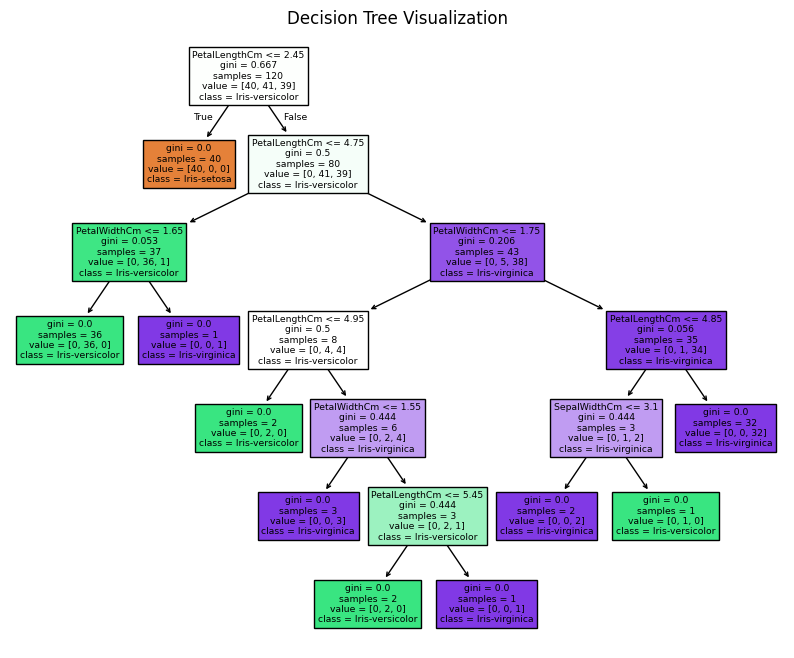

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# === 1. Завантаження даних ===
url_ = 'https://drive.google.com/uc?id=10vsX925g8ff4QdgQpnsguo4DHUHOPgAL'
df = pd.read_csv(url_)

print("Розмірність даних:", df.shape)
print(df.head())

# === 2. Підготовка даних ===
X = df.drop(['Id', 'Species'], axis=1)
y = df['Species']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# === 3. Створення моделей ===
models = {
    "Decision Tree": DecisionTreeClassifier(criterion='gini', random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM (linear)": SVC(kernel='linear', random_state=42),
    "SVM (rbf)": SVC(kernel='rbf', random_state=42)
}

# === 4. Навчання і тестування ===
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"\n=== {name} ===")
    print("Accuracy:", round(acc, 3))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))

# === 5. Порівняння результатів ===
print("\n=== Порівняння точності моделей ===")
for name, acc in results.items():
    print(f"{name}: {round(acc, 3)}")

# === 6. Візуалізація дерева рішень ===
plt.figure(figsize=(10, 8))
plot_tree(models["Decision Tree"],
          feature_names=['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'],
          class_names=['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'],
          filled=True)
plt.title("Decision Tree Visualization")
plt.show()
